<h1> Capstone Final Project

<h3>Introduction/Business Problem

In the Data Science Capstone course, an exploratory data analysis was conducted to examine and cluster venues in areas of Toronto, Ontario with a Borough name that included the word 'Toronto'. Six boroughs were identified and neighborhoods within each of those boroughs were examined. The analysis revealed the most popular venues within the neighborhoods of those six boroughs. 

This report will expand on that analysis to examine the most popular types of restaurants in all boroughs in Toronto, Ontario. The analysis will provide venue information from the Foursquare location data tool to identify the most popular restaurants and their food types in each neighborhood in Toronto. This information can be used by tourists, visitors, or individuals who are new to the city to identify the most popular restaurants in each neighborhood by type of food. This information could also be used by individuals who are considering opening a new restaurant of a specific type to identify where that type of food is most popular in Toronto or where fewer restaurants of that type or located, which may be a good opportunity for business development in less crowded areas.


<h3>Data Description

The data used in the analysis will contain Toronto area location identified by postal code from the wikipedia postal code website:  <a href='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'>https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M</a>. 

The data will be downloaded in the form of a json file. This data will be used to identify neighborhoods within Toronto by postal code. Using the postal codes for each of the neighborhoods, the longitude and latitude can be identified and passed to the FourSquare application to obtain the venue listings. A sample of the Postal Code json data is below. 
<img src='Json.jpg'>


Geocoder data to obtain each neighborhood's longitude and latitude was an option considered, but the application is unstable so instead the longitude and latitude will come from a pre-loaded file from the Data Science capstone course that was used in the Week 3 Assignment.https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv This data file provides postal code, longitude, and latitude and will be merged with the postal code data to produce a dataset that includes the longitude and latitude for each neighborhood, which will be used with the FourSquare application.

A sample of the csv data that was read into a dataframe is provided below.
<img src='csv%20exammple.jpg'>

Venue information for each neighborhood will be obtained using the FourSquare application. Information on FourSquare can be found here: https://foursquare.com/ or on this page for developer information: https://developer.foursquare.com/


FourSquare data will be obtained using the dataset produced with the two above data sources, identifying each Toronto neighborhood, postal code, longitude and latitude. The data from FourSquare will be received in the form of a json file, with a sample of the data provided below.
<img src='FourSquare_example.jpg'>

<h1> Begin code
    

In [546]:
#imports for Part 1
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as soup

In [547]:
#define the site, get the data, and parse with soup
URL = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = requests.get(URL)
soupData = soup(page.content, 'html.parser')
#soupData.prettify()

In [548]:
#find the table data for the three columns needed and clean data, removing rows where borough not assigned. 
table_contents=[]
table=soupData.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

In [549]:
#Add the data to a dataframe and show the top 12 rows.
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df.head()


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [550]:
df.shape

(103, 3)

In [551]:
# Read the csv file provided in the assignment into a dataframe to get the coordinates.
#https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv

df2=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')
df2.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [552]:
#renamed the postal code column to remove the space so the col name would be the same as the initial df for merging.
df2.rename(columns={'Postal Code':'PostalCode'}, inplace=True)
df3 = pd.merge(df, df2)
df3.head(12)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [553]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Libraries imported.')

Libraries imported.


In [554]:
address = 'Toronto, Ontario'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [555]:
#build the dataframe with data from boroughs that contain the word, 'Toronto' only.
toronto_data =df3  #.reset_index(drop=True)
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [556]:
#create the folium for toronto
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [557]:
CLIENT_ID = 'HJ3CUZXAUAJND42SCRPLZSKJP1VZFPVVC321NTOQWUVM3YHD' # your Foursquare ID
CLIENT_SECRET = 'CJ3PMLLBBB1NI5HCCRX3R4DL3UNE0UGHTQCEQZ15WYSV24ZG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
categoryId= '4d4b7105d754a06374d81259' #Food category from the Foursquare category documentation: https://developer.foursquare.com/docs/build-with-foursquare/categories/


In [558]:
radius=500
url = 'https://api.foursquare.com/v2/venues/explore?&categoryID=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude,
    longitude,
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&categoryID=4d4b7105d754a06374d81259&client_id=HJ3CUZXAUAJND42SCRPLZSKJP1VZFPVVC321NTOQWUVM3YHD&client_secret=CJ3PMLLBBB1NI5HCCRX3R4DL3UNE0UGHTQCEQZ15WYSV24ZG&v=20180605&ll=43.6534817,-79.3839347&radius=500&limit=100'

In [ ]:
results = requests.get(url).json()

In [ ]:
#the function to get the nearby venues
#&categoryID=4d4b7105d754a06374d81259

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&categoryID=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,)
        #print(url)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['categories'][0]['id'],
            v['venue']['categories'][0]['icon']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',           
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Category_ID',
                  'Icon']
    print("Last URL:", url)
    return(nearby_venues)

In [ ]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )


In [559]:
print(toronto_venues.shape)
toronto_venues.head(10)
                   

(2106, 10)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Category_ID,Icon,Prefix
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park,4bf58dd8d48988d163941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/parks_o...
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop,4bf58dd8d48988d1f9941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/shops/f...
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena,4bf58dd8d48988d185941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/arts_en...
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,4def73e84765ae376e57713a,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/po...
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop,4bf58dd8d48988d1e0931735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/co...
5,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place,4bf58dd8d48988d1ca941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/pi...
6,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery,4bf58dd8d48988d16a941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/ba...
7,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop,4bf58dd8d48988d1e0931735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/co...
8,"Regent Park, Harbourfront",43.654260,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center,52e81612bcbc57f1066b7a37,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/buildin...
9,"Regent Park, Harbourfront",43.654260,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa,4bf58dd8d48988d1ed941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/shops/spa_


In [560]:
toronto_rests = toronto_venues
toronto_rests.shape
x = toronto_rests['Icon'].apply(pd.Series)
pre = x['prefix']
toronto_rests['Prefix'] = pre
toronto_rests =toronto_rests[toronto_rests['Prefix'].str.contains("food")].reset_index(drop=True)

In [561]:
toronto_rests['Venue Category'].unique()

array(['Food & Drink Shop', 'Portuguese Restaurant', 'Coffee Shop',
       'Pizza Place', 'Bakery', 'Restaurant', 'Breakfast Spot',
       'Farmers Market', 'Dessert Shop', 'French Restaurant', 'Café',
       'Asian Restaurant', 'Vietnamese Restaurant', 'Italian Restaurant',
       'Creperie', 'Sushi Restaurant', 'Burrito Place',
       'Mexican Restaurant', 'Diner', 'Wings Joint',
       'Fried Chicken Joint', 'Japanese Restaurant', 'Smoothie Shop',
       'Sandwich Place', 'Fast Food Restaurant', 'Caribbean Restaurant',
       'Gastropub', 'Ramen Restaurant', 'Burger Joint', 'Steakhouse',
       'Thai Restaurant', 'Modern European Restaurant',
       'New American Restaurant', 'Tea Room', 'Middle Eastern Restaurant',
       'Chinese Restaurant', 'Ethiopian Restaurant', 'Seafood Restaurant',
       'Bubble Tea Shop', 'Wine Bar', 'Ice Cream Shop', 'Poutine Place',
       'Grocery Store', 'Supermarket', 'Dim Sum Restaurant', 'Food Truck',
       'BBQ Joint', 'American Restaurant',
     

In [562]:
toronto_rests.shape

(1250, 10)

In [563]:
def clean_category(dataset, category):
    index_names = dataset[ (dataset['Venue Category'] ==category)].index
    dataset.drop(index_names, inplace = True)
    return dataset

In [564]:
clean_category(toronto_rests,'Grocery Store')
clean_category(toronto_rests,'Restaurant')
clean_category(toronto_rests,'Food & Drink Shop')
clean_category(toronto_rests,'Liquor Store')
clean_category(toronto_rests,'Coffee Shop')
clean_category(toronto_rests,'Fruit & Vegetable Store')
clean_category(toronto_rests,'Butcher')
clean_category(toronto_rests,'Organic Grocery')
clean_category(toronto_rests,'Supermarket')


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Category_ID,Icon,Prefix
1,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,4def73e84765ae376e57713a,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/po...
3,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place,4bf58dd8d48988d1ca941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/pi...
4,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery,4bf58dd8d48988d16a941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/ba...
7,"Regent Park, Harbourfront",43.654260,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot,4bf58dd8d48988d143941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/br...
8,"Regent Park, Harbourfront",43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,Farmers Market,4bf58dd8d48988d1fa941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/shops/f...
9,"Regent Park, Harbourfront",43.654260,-79.360636,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot,4bf58dd8d48988d143941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/br...
15,"Regent Park, Harbourfront",43.654260,-79.360636,Cacao 70,43.650067,-79.360723,Dessert Shop,4bf58dd8d48988d1d0941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/de...
16,"Regent Park, Harbourfront",43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant,4bf58dd8d48988d10c941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/fr...
17,"Regent Park, Harbourfront",43.654260,-79.360636,Brick Street Bakery,43.650574,-79.359539,Bakery,4bf58dd8d48988d16a941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/ba...
18,"Regent Park, Harbourfront",43.654260,-79.360636,ODIN Cafe + Bar,43.656739,-79.356503,Café,4bf58dd8d48988d16d941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/cafe_


In [565]:
toronto_rests.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Category_ID,Icon,Prefix
1,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,4def73e84765ae376e57713a,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/po...
3,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place,4bf58dd8d48988d1ca941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/pi...
4,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery,4bf58dd8d48988d16a941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/ba...
7,"Regent Park, Harbourfront",43.654260,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot,4bf58dd8d48988d143941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/food/br...
8,"Regent Park, Harbourfront",43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,Farmers Market,4bf58dd8d48988d1fa941735,{'prefix': 'https://ss3.4sqi.net/img/categorie...,https://ss3.4sqi.net/img/categories_v2/shops/f...


In [566]:
toronto_food = toronto_rests.drop(columns=['Category_ID','Icon','Prefix'])
toronto_food.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
3,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place
4,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
7,"Regent Park, Harbourfront",43.654260,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
8,"Regent Park, Harbourfront",43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,Farmers Market
9,"Regent Park, Harbourfront",43.654260,-79.360636,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot
15,"Regent Park, Harbourfront",43.654260,-79.360636,Cacao 70,43.650067,-79.360723,Dessert Shop
16,"Regent Park, Harbourfront",43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant
17,"Regent Park, Harbourfront",43.654260,-79.360636,Brick Street Bakery,43.650574,-79.359539,Bakery
18,"Regent Park, Harbourfront",43.654260,-79.360636,ODIN Cafe + Bar,43.656739,-79.356503,Café


In [567]:
toronto_food.shape #after categories removed

(941, 7)

In [ ]:
#toronto_food.describe()

<AxesSubplot:ylabel='Venue Category'>

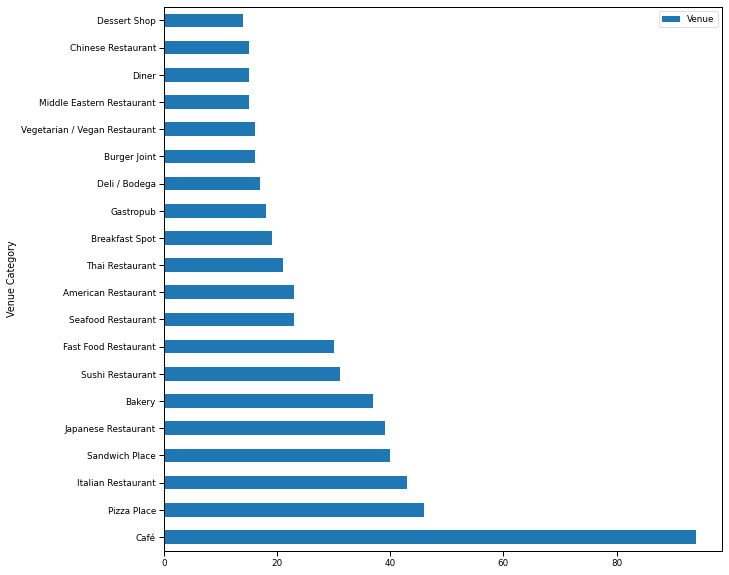

In [568]:
t_ven_counts = toronto_food[['Venue Category','Venue']]
rests_per_nh=t_ven_counts.groupby('Venue Category').count()
rests_per_nh.sort_values(by=['Venue'], inplace=True, ascending=False)
rests_per_nh.head(20)
rests_per_nh.head(20).plot(kind="barh",figsize=(10,10))



In [569]:
grests_countdf=toronto_food[['Venue Category','Neighborhood','Venue']]
grouped_rests=grests_countdf.groupby(['Neighborhood','Venue Category']).agg({'Venue':['count']})
grouped_rests.columns =['count']

grouped_rests = grouped_rests.reset_index()
grouped_rests.sort_values(by=['Neighborhood','Venue Category'],inplace=True)
grouped_rests.head(20)

#temp1 = grouped_multiple.loc[grouped_multiple['Cluster Labels'] ==i]
#temp1.sort_values(by='count',inplace=True, ascending=False)

,Neighborhood,Venue Category,count
0,Agincourt,Breakfast Spot,1
1,Agincourt,Latin American Restaurant,1
2,"Alderwood, Long Branch",Pizza Place,2
3,"Alderwood, Long Branch",Sandwich Place,1
4,"Bathurst Manor, Wilson Heights, Downsview North",Deli / Bodega,1
5,"Bathurst Manor, Wilson Heights, Downsview North",Diner,1
6,"Bathurst Manor, Wilson Heights, Downsview North",Fried Chicken Joint,1
7,"Bathurst Manor, Wilson Heights, Downsview North",Frozen Yogurt Shop,1
8,"Bathurst Manor, Wilson Heights, Downsview North",Ice Cream Shop,1
9,"Bathurst Manor, Wilson Heights, Downsview North",Middle Eastern Restaurant,1


In [570]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_food[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_food['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

#toronto_food_group = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
#toronto_rest_group
#toronto_grouped.head()

In [571]:
num_top_venues = 10

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
  

----Agincourt----
                             venue  freq
0                   Breakfast Spot   0.5
1        Latin American Restaurant   0.5
2              American Restaurant   0.0
3                Korean Restaurant   0.0
4                     Noodle House   0.0
5          New American Restaurant   0.0
6              Moroccan Restaurant   0.0
7  Molecular Gastronomy Restaurant   0.0
8       Modern European Restaurant   0.0
9        Middle Eastern Restaurant   0.0


----Alderwood, Long Branch----
                             venue  freq
0                      Pizza Place  0.67
1                   Sandwich Place  0.33
2        Latin American Restaurant  0.00
3                     Noodle House  0.00
4          New American Restaurant  0.00
5              Moroccan Restaurant  0.00
6  Molecular Gastronomy Restaurant  0.00
7       Modern European Restaurant  0.00
8        Middle Eastern Restaurant  0.00
9               Mexican Restaurant  0.00


----Bathurst Manor, Wilson Heights, Downsview

                             venue  freq
0                      Wings Joint   0.2
1                           Bakery   0.2
2                   Sandwich Place   0.2
3                     Burger Joint   0.2
4             Fast Food Restaurant   0.2
5         Mediterranean Restaurant   0.0
6                     Noodle House   0.0
7          New American Restaurant   0.0
8              Moroccan Restaurant   0.0
9  Molecular Gastronomy Restaurant   0.0


----New Toronto, Mimico South, Humber Bay Shores----
                     venue  freq
0                     Café  0.25
1      American Restaurant  0.12
2       Seafood Restaurant  0.12
3       Mexican Restaurant  0.12
4     Fast Food Restaurant  0.12
5              Pizza Place  0.12
6                   Bakery  0.12
7        Health Food Store  0.00
8             Noodle House  0.00
9  New American Restaurant  0.00


----North Park, Maple Leaf Park, Upwood Park----
                             venue  freq
0                           Bakery   1.

In [572]:
toronto_grouped.head()

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gastropub,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Hakka Restaurant,Health Food Store,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Pizza Place,Poke Place,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Smoothie Shop,Snack Place,Soup Place,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Agincourt,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.111111,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.111111,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.000000,0.0,0.066667,0.0,0.0,0.066667,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.000000,0.066667,0.133333,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.066667,0.0,0.0,0

In [573]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [575]:
num_top_venues =10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Breakfast Spot,Wings Joint,Farmers Market,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
1,"Alderwood, Long Branch",Pizza Place,Sandwich Place,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant
2,"Bathurst Manor, Wilson Heights, Downsview North",Fried Chicken Joint,Ice Cream Shop,Pizza Place,Middle Eastern Restaurant,Diner,Sandwich Place,Sushi Restaurant,Deli / Bodega,Frozen Yogurt Shop,Filipino Restaurant
3,Bayview Village,Chinese Restaurant,Japanese Restaurant,Café,Wings Joint,Falafel Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Sandwich Place,American Restaurant,Sushi Restaurant,Fast Food Restaurant,Greek Restaurant,Indian Restaurant,Juice Bar,Cupcake Shop,Pizza Place
5,Berczy Park,Farmers Market,Bakery,Cheese Shop,Seafood Restaurant,Comfort Food Restaurant,Juice Bar,Japanese Restaurant,Creperie,Indian Restaurant,Eastern European Restaurant
6,"Birch Cliff, Cliffside West",Café,Wings Joint,Falafel Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
7,"Brockton, Parkdale Village, Exhibition Place",Café,Bakery,Breakfast Spot,Italian Restaurant,Burrito Place,Wings Joint,Fast Food Restaurant,Diner,Doner Restaurant,Donut Shop
8,Cedarbrae,Fried Chicken Joint,Bakery,Hakka Restaurant,Thai Restaurant,Caribbean Restaurant,Falafel Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop
9,Central Bay Street,Sandwich Place,Italian Restaurant,Café,Salad Place,Bubble Tea Shop,Burger Joint,Korean Restaurant,Indian Restaurant,Ice Cream Shop,Middle Eastern Restaurant


In [576]:
#look for the elbow to get the right k
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
sum_squares=[]
k_poss=range(1,20)
for k in k_poss:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
    sum_squares.append(kmeans.inertia_)
    



[24.12346460138737, 21.3026180742399, 19.96998052953898, 18.679855942956248, 17.62736364751921, 16.47220326669474, 15.443820889866874, 14.431887410757609, 13.422187782696675, 12.414004931418074, 11.543595744374914, 10.780930871706714, 9.94080230764518, 9.28156307661844, 8.682543432252283, 8.303026838679568, 7.771624240606336, 7.446034613851654, 6.928979402402187]


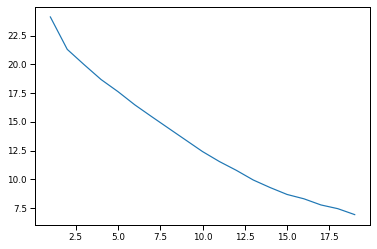

In [577]:
#print(k_poss,sum_squares)
import matplotlib.pyplot as plt
plt.plot(k_poss,sum_squares)
print(sum_squares)

In [578]:
from sklearn.metrics import silhouette_score 

range(2, 20) [0.2534296855699702, 0.2586267078197195, 0.15543355956929764, 0.2681906188953071, 0.2754953671581569, 0.27483515686436366, 0.2007791832274612, 0.20784197773548915, 0.21503786203438893, 0.277492862125123, 0.1910118680870649, 0.15533273460634273, 0.2118292025471107, 0.1261422930936441, 0.11607782678935158, 0.12273561344753234, 0.1605971090165302, 0.16664658013038022]


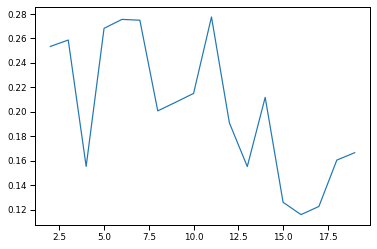

In [579]:
ss = []
k_ss = range(2,20)
for k in k_ss:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
    labels=kmeans.labels_
    ss.append(silhouette_score(toronto_grouped_clustering,labels,metric='euclidean'))

plt.plot(k_ss,ss)
#highest point is 6,11
print(k_ss,ss)

In [580]:
# set number of clusters
kclusters =6

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 

In [581]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged =toronto_food # toronto_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#toronto_merged.dropna()
toronto_merged.head() # check the last columns!

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,1,Pizza Place,Portuguese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant
3,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place,1,Pizza Place,Portuguese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant
4,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery,0,Bakery,Café,Breakfast Spot,Farmers Market,Asian Restaurant,French Restaurant,Dessert Shop,Wings Joint,Diner,Doner Restaurant
7,"Regent Park, Harbourfront",43.654260,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot,0,Bakery,Café,Breakfast Spot,Farmers Market,Asian Restaurant,French Restaurant,Dessert Shop,Wings Joint,Diner,Doner Restaurant
8,"Regent Park, Harbourfront",43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,Farmers Market,0,Bakery,Café,Breakfast Spot,Farmers Market,Asian Restaurant,French Restaurant,Dessert Shop,Wings Joint,Diner,Doner Restaurant


In [ ]:
#toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

In [582]:
cols = ['Cluster Labels','1st Most Common Venue','2nd Most Common Venue']
countdf= toronto_merged[cols]
countdf.shape


(941, 3)

In [583]:
cols = ['Cluster Labels','Neighborhood','1st Most Common Venue','2nd Most Common Venue']
countdf= toronto_merged[cols]
countdf.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue
1,1,Victoria Village,Pizza Place,Portuguese Restaurant
3,1,Victoria Village,Pizza Place,Portuguese Restaurant
4,0,"Regent Park, Harbourfront",Bakery,Café
7,0,"Regent Park, Harbourfront",Bakery,Café
8,0,"Regent Park, Harbourfront",Bakery,Café


In [584]:
testcols = ['Cluster Labels','Neighborhood','1st Most Common Venue','2nd Most Common Venue', 'Venue']
testcountdf= toronto_merged[cols]
testcountdf.head()
testcountdftemp1 = testcountdf.loc[testcountdf['Cluster Labels'] ==0]
testcountdftemp1.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue
4,0,"Regent Park, Harbourfront",Bakery,Café
7,0,"Regent Park, Harbourfront",Bakery,Café
8,0,"Regent Park, Harbourfront",Bakery,Café
9,0,"Regent Park, Harbourfront",Bakery,Café
15,0,"Regent Park, Harbourfront",Bakery,Café


In [585]:
toronto_merged.head()
tor_food_borough = toronto_merged.join(toronto_data.set_index('Neighborhood'),on='Neighborhood')
tor_food_borough.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PostalCode,Borough,Latitude,Longitude
1,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,1,Pizza Place,Portuguese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,M4A,North York,43.725882,-79.315572
3,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place,1,Pizza Place,Portuguese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,M4A,North York,43.725882,-79.315572
4,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery,0,Bakery,Café,Breakfast Spot,Farmers Market,Asian Restaurant,French Restaurant,Dessert Shop,Wings Joint,Diner,Doner Restaurant,M5A,Downtown Toronto,43.654260,-79.360636
7,"Regent Park, Harbourfront",43.654260,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot,0,Bakery,Café,Breakfast Spot,Farmers Market,Asian Restaurant,French Restaurant,Dessert Shop,Wings Joint,Diner,Doner Restaurant,M5A,Downtown Toronto,43.654260,-79.360636
8,"Regent Park, Harbourfront",43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,Farmers Market,0,Bakery,Café,Breakfast Spot,Farmers Market,Asian Restaurant,French Restaurant,Dessert Shop,Wings Joint,Diner,Doner Restaurant,M5A,Downtown Toronto,43.654260,-79.360636


<AxesSubplot:ylabel='Borough'>

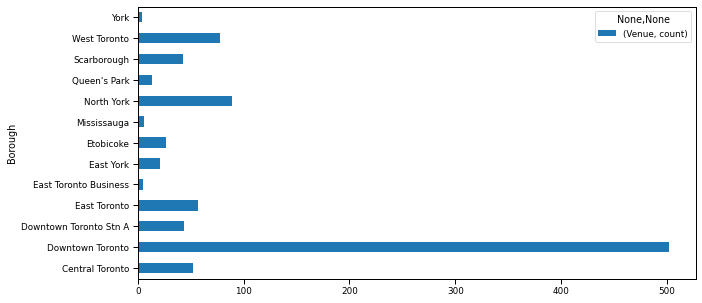

In [586]:
tor_food_bor_group = tor_food_borough[['Cluster Labels','Neighborhood','Borough','1st Most Common Venue','2nd Most Common Venue', 'Venue']]
tor_food_bor_group.sort_values(by='Borough').head(10)

tor_food_bor_group_b = tor_food_bor_group.groupby('Borough').agg({'Venue':['count']})
tor_food_bor_group_b.head(30)
tor_food_bor_group_b.plot(kind="barh",figsize=(10,5))



In [587]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Neighborhood Latitude'], toronto_merged['Neighborhood Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
#for lat, lon, poi, cluster in zip(toronto_merged['Venue Latitude'], toronto_merged['Venue Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):

#for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [588]:
#Make graphs of venue counts per cluster in loop
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

cols = ['Cluster Labels','Neighborhood','1st Most Common Venue','2nd Most Common Venue', 'Venue']
countdf= toronto_merged[cols]
countdf.head()
g_countdf = countdf 
g_countdf2 = countdf
g_countdf3 = countdf
#sum_df = pd.DataFrame(columns=['Cluster', 'Neighborhood','1st','2nd','NumVenues'])

n=range(0,kclusters)
for i in n:

    grouped_multiple=g_countdf.groupby(['Cluster Labels','1st Most Common Venue']).agg({'Venue':['count']})
    grouped_multiple.columns =['count']

    grouped_multiple = grouped_multiple.reset_index()
    grouped_multiple.sort_values(by=['Cluster Labels','1st Most Common Venue'],inplace=True)
    #print(grouped_multiple.head(20))

    temp1 = grouped_multiple.loc[grouped_multiple['Cluster Labels'] ==i]
    temp1.sort_values(by='count',inplace=True, ascending=False)

    grouped_2 = g_countdf2.groupby(['Cluster Labels','2nd Most Common Venue']).agg({'Venue':['count']})
    grouped_2.columns=['count']
    grouped_2= grouped_2.reset_index()
    grouped_2.sort_values(by=['Cluster Labels','2nd Most Common Venue'],inplace=True)
    #temp2.sort_values(by='count',inplace=True, ascending=False)

    temp2_onerow=grouped_2.loc[grouped_2['Cluster Labels'] == i]
    temp2_onerow.sort_values(by='count',inplace=True, ascending=False)
  
    
   
   # temp1.head(5).plot.barh(x='1st Most Common Venue',y='count',title='1st Most Common for Cluster: '+str(i),
   #                        sort_columns='count')

    #temp2_onerow.head(5).plot.barh(x='2nd Most Common Venue',y='count',title='2nd Most Common for Cluster: '+str(i))
    print("\n*****Top 5 for categories in 1st and 2nd most common for Cluster:",i,"\n",temp1.head(5),'\n',temp2_onerow.head(5),'\n\n****************************\n') 

    #figsize=(3,8)
 
   


*****Top 5 for categories in 1st and 2nd most common for Cluster: 0 
     Cluster Labels 1st Most Common Venue  count
6                0                  Café    398
28               0      Sushi Restaurant     71
26               0        Sandwich Place     50
27               0    Seafood Restaurant     44
4                0       Bubble Tea Shop     42 
     Cluster Labels  2nd Most Common Venue  count
18               0    Japanese Restaurant    202
17               0     Italian Restaurant    155
24               0  Vietnamese Restaurant     74
2                0                 Bakery     66
6                0                   Café     63 

****************************


*****Top 5 for categories in 1st and 2nd most common for Cluster: 1 
     Cluster Labels 1st Most Common Venue  count
32               1           Pizza Place     14 
     Cluster Labels 2nd Most Common Venue  count
29               1             Gastropub      3
31               1        Sandwich Place      3


<ipython-input-588-601dd4d84aa0>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1.sort_values(by='count',inplace=True, ascending=False)
<ipython-input-588-601dd4d84aa0>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2_onerow.sort_values(by='count',inplace=True, ascending=False)
<ipython-input-588-601dd4d84aa0>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1.sort_values(by='count',inplace=True, ascending=False)
<ip

In [589]:
tor_food_borough.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PostalCode,Borough,Latitude,Longitude
1,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,1,Pizza Place,Portuguese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,M4A,North York,43.725882,-79.315572
3,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place,1,Pizza Place,Portuguese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,M4A,North York,43.725882,-79.315572
4,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery,0,Bakery,Café,Breakfast Spot,Farmers Market,Asian Restaurant,French Restaurant,Dessert Shop,Wings Joint,Diner,Doner Restaurant,M5A,Downtown Toronto,43.654260,-79.360636
7,"Regent Park, Harbourfront",43.654260,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot,0,Bakery,Café,Breakfast Spot,Farmers Market,Asian Restaurant,French Restaurant,Dessert Shop,Wings Joint,Diner,Doner Restaurant,M5A,Downtown Toronto,43.654260,-79.360636
8,"Regent Park, Harbourfront",43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,Farmers Market,0,Bakery,Café,Breakfast Spot,Farmers Market,Asian Restaurant,French Restaurant,Dessert Shop,Wings Joint,Diner,Doner Restaurant,M5A,Downtown Toronto,43.654260,-79.360636


<AxesSubplot:ylabel='Cluster Labels'>

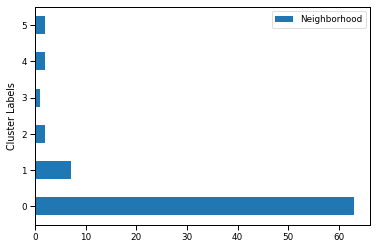

In [590]:
clus_neigh = tor_food_borough[['Neighborhood','Cluster Labels']]
clus_neigh.groupby(['Cluster Labels']).nunique().plot(kind='barh')

<AxesSubplot:ylabel='Cluster Labels,Borough'>

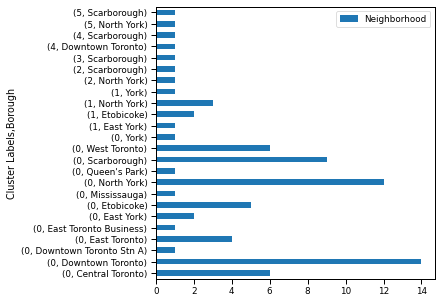

In [591]:
bur_neigh = tor_food_borough[['Neighborhood','Cluster Labels','Borough']]
bur_neigh.groupby(['Cluster Labels','Borough']).nunique().plot(kind="barh", figsize=(5,5))

In [592]:
tor_food_borough.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PostalCode,Borough,Latitude,Longitude
1,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,1,Pizza Place,Portuguese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,M4A,North York,43.725882,-79.315572
3,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place,1,Pizza Place,Portuguese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,M4A,North York,43.725882,-79.315572
4,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery,0,Bakery,Café,Breakfast Spot,Farmers Market,Asian Restaurant,French Restaurant,Dessert Shop,Wings Joint,Diner,Doner Restaurant,M5A,Downtown Toronto,43.654260,-79.360636
7,"Regent Park, Harbourfront",43.654260,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot,0,Bakery,Café,Breakfast Spot,Farmers Market,Asian Restaurant,French Restaurant,Dessert Shop,Wings Joint,Diner,Doner Restaurant,M5A,Downtown Toronto,43.654260,-79.360636
8,"Regent Park, Harbourfront",43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,Farmers Market,0,Bakery,Café,Breakfast Spot,Farmers Market,Asian Restaurant,French Restaurant,Dessert Shop,Wings Joint,Diner,Doner Restaurant,M5A,Downtown Toronto,43.654260,-79.360636
